In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import openpathsampling as paths
import openpathsampling.storage as st
storage = st.AnalysisStorage("mistis.nc")

In [3]:
mistis = storage.networks.load(0)

In [4]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)

True <openpathsampling.ensemble.TISEnsemble object at 0x10f2e6810>
True <openpathsampling.ensemble.TISEnsemble object at 0x10f625810>
True <openpathsampling.ensemble.TISEnsemble object at 0x10f625690>


In [5]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [6]:
scheme = storage.schemes[0]
scheme.move_summary(storage)

ms_outer_shooting ran 3.98671096346% of the cycles with acceptance 3/12 (0.25)
repex ran 20.9302325581% of the cycles with acceptance 23/63 (0.365079365079)
shooting ran 48.5049833887% of the cycles with acceptance 86/146 (0.58904109589)
minus ran 1.32890365449% of the cycles with acceptance 4/4 (1.0)
pathreversal ran 24.9169435216% of the cycles with acceptance 56/75 (0.746666666667)


In [7]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [8]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})"
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",NaN,NaN,0.02063995
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.09694779,0.01223107,NaN
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.4669794,1,NaN


In [9]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

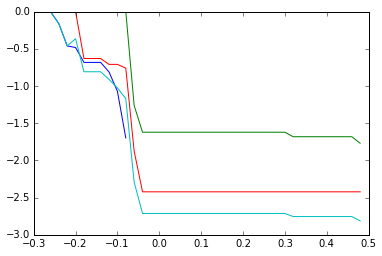

In [10]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))